Lokalna pretraga

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def f1(x):
    return (x+2)**2

In [3]:
def f2(x):
    return (x+2)**2 + 24 * np.sin(1.3 * x) + 6

In [4]:
def f3(x):
    return 0.1 * x**4 - 2.4* (x+5)**2 + 13 * (x+5) + 144 * np.sin(3*x)

In [5]:
def extract_x(l):
    x_values = []
    for i in l:
        x_values.append(i[0])
    return x_values

In [6]:
def extract_y(l):
    y_values = []
    for i in l:
        y_values.append(i[1])
    return y_values

In [7]:
def draw_graph(f, start, stop, step, x_values, y_values, name):
    x = np.linspace(start, stop, step)
    y = f(x)
    
    plt.title('Grafik funkcije %s'%(name))
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    
    plt.plot(x, y, label='f(x)')
    plt.scatter(x_values[0], y_values[0], marker='v', color='red', label='start')
    plt.scatter(x_values[1:-1], y_values[1:-1], color = 'green', label='history')
    plt.scatter(x_values[-1], y_values[0-1], marker='x', color='red', label='stop')
    plt.legend()
    plt.show()

Zadatak 1

In [8]:
def LocalSearch(f, num_of_iterations=1000, delta=0.1, x_min=-10, x_max=10):
    x = random.uniform(x_min, x_max) 
    x = 5
    search_history = [[x, f(x)]]

    for _ in range(num_of_iterations):
        neighbor1 = x - delta
        neighbor2 = x + delta
        if f(neighbor1) < f(x):
            x = neighbor1
            search_history.append([neighbor1, f(neighbor1)])
        elif f(neighbor2) < f(x):
            x = neighbor2
            search_history.append([neighbor2, f(neighbor2)])
        else:
            return search_history
    return search_history

In [9]:
l = LocalSearch(f1, delta=0.5)
x_values = extract_x(l)
y_values = extract_y(l)

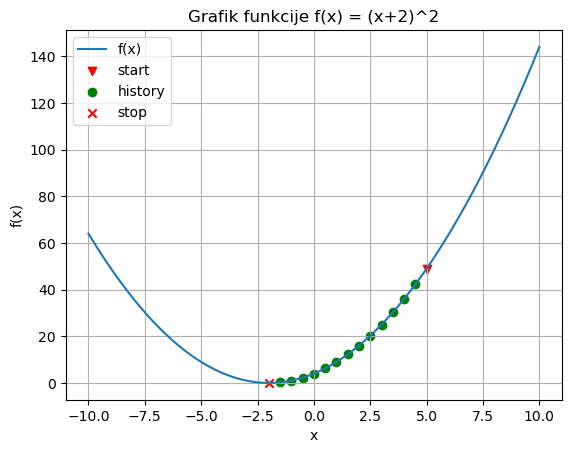

In [10]:
draw_graph(f1, -10, 10, 500, x_values, y_values, 'f(x) = (x+2)^2')

In [11]:
l = LocalSearch(f2, delta=0.5)
x_values = extract_x(l)
y_values = extract_y(l)

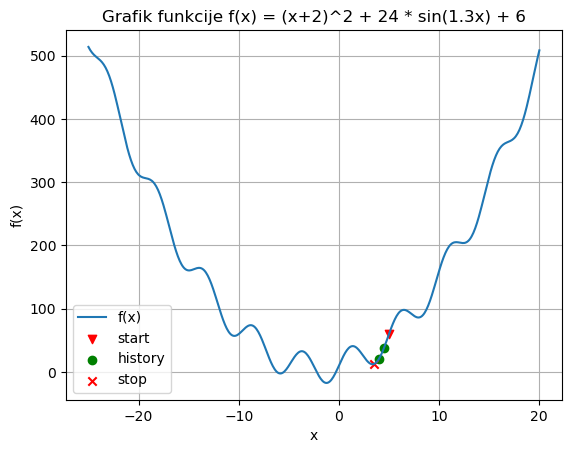

In [12]:
draw_graph(f2, -25, 20, 500, x_values, y_values, 'f(x) = (x+2)^2 + 24 * sin(1.3x) + 6')

In [13]:
l = LocalSearch(f3)
x_values = extract_x(l)
y_values = extract_y(l)

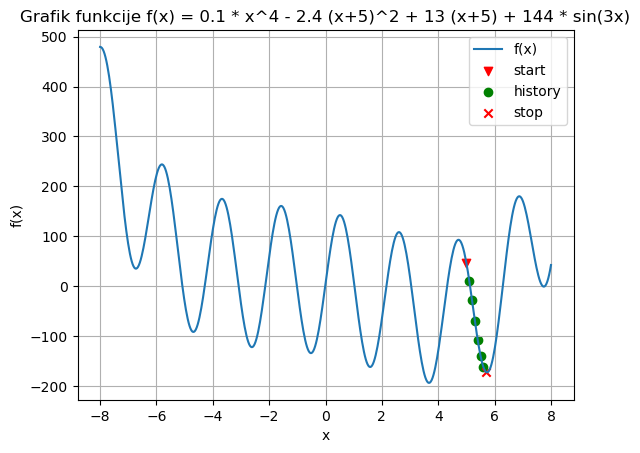

In [14]:
draw_graph(f3, -8, 8, 500, x_values, y_values, 'f(x) = 0.1 * x^4 - 2.4 (x+5)^2 + 13 (x+5) + 144 * sin(3x)')

Zadatak 2

In [15]:
def IteratedLocalSearch(f, num_of_iterations=1000, delta=0.1, x_min=-10, x_max=10, num_restarts=10):
    best_solution = None
    best_value = float('inf')
    
    for _ in range(num_restarts):
        x = random.uniform(x_min, x_max)
        search_history = [[x, f(x)]]

        for _ in range(num_of_iterations):
            neighbor1 = x - delta
            neighbor2 = x + delta
            
            if f(neighbor1) < f(x):
                x = neighbor1
                search_history.append([neighbor1, f(neighbor1)])
            elif f(neighbor2) < f(x):
                x = neighbor2
                search_history.append([neighbor2, f(neighbor2)])
            else:
                break
        
        if f(x) < best_value:
            best_solution = search_history
            best_value = f(x)

    return best_solution

In [16]:
l = IteratedLocalSearch(f1, delta=0.5)
x_values = extract_x(l)
y_values = extract_y(l)

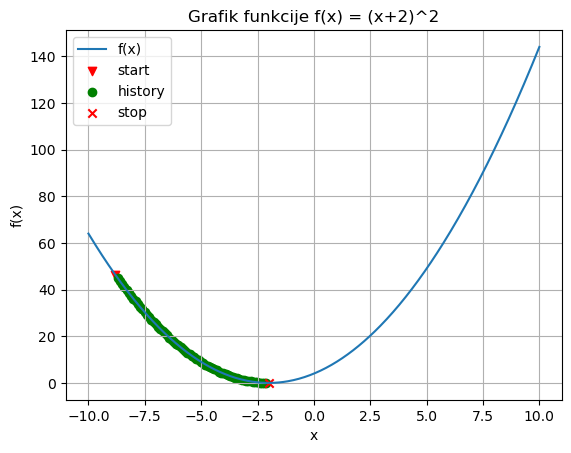

In [17]:
draw_graph(f1, -10, 10, 500, x_values, y_values, 'f(x) = (x+2)^2')

In [18]:
l = IteratedLocalSearch(f2, delta=0.5)
x_values = extract_x(l)
y_values = extract_y(l)

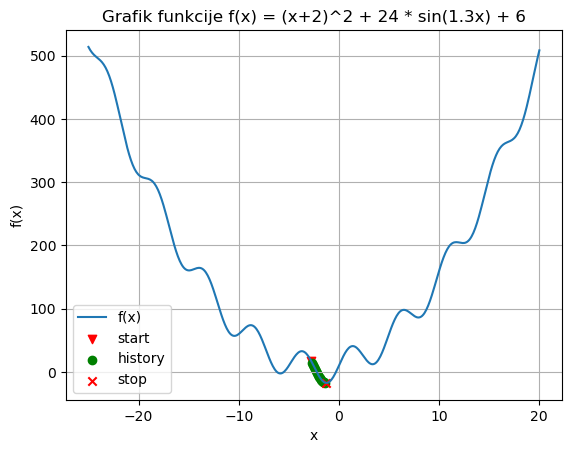

In [19]:
draw_graph(f2, -25, 20, 500, x_values, y_values, 'f(x) = (x+2)^2 + 24 * sin(1.3x) + 6')

In [20]:
l = IteratedLocalSearch(f3)
x_values = extract_x(l)
y_values = extract_y(l)

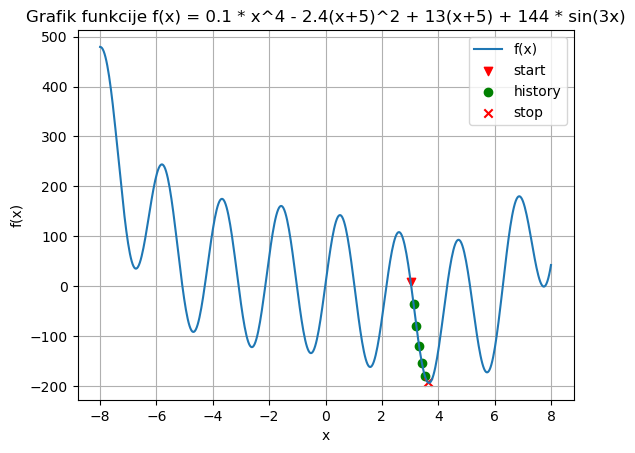

In [21]:
draw_graph(f3, -8, 8, 500, x_values, y_values, 'f(x) = 0.1 * x^4 - 2.4(x+5)^2 + 13(x+5) + 144 * sin(3x)')